Enter the number of users you want to add: 3
Enter name for user 1: Nikos
Enter name for user 2: Maria
Enter name for user 3: Kostas
Enter the number of categories you want to add: 2
Enter name for category 1: food
Enter name for category 2: other
Enter the number of expenses you want to add: 2
Enter user ID for expense 1: 1
Enter category ID for expense 1: 1
Enter amount for expense 1: 100
Expense added successfully.
Enter user ID for expense 2: 2
Enter category ID for expense 2: 2
Enter amount for expense 2: 150
Expense added successfully.
All expenses:
User: Nikos | Category: food | Amount: 100.0
User: Maria | Category: other | Amount: 150.0
User expenses: {'Nikos': 100.0, 'Maria': 150.0}


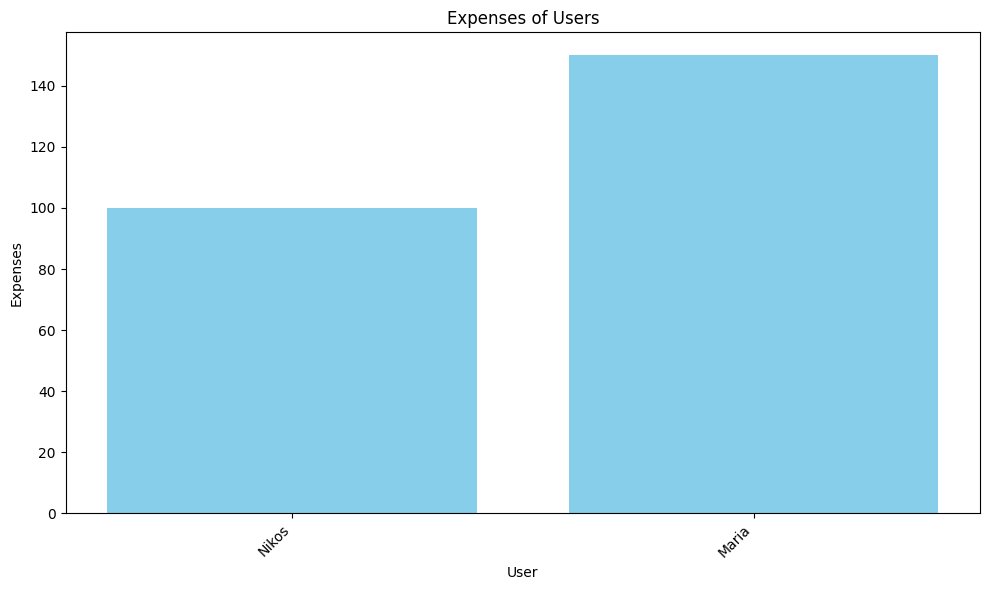

In [2]:
import sqlite3
import matplotlib.pyplot as plt


# lets make a database

def create_database():
    conn = sqlite3.connect('my_database.db')
    cursor = conn.cursor()

#clear the tables from previous running
    cursor.execute('''DROP TABLE IF EXISTS expenses''')
    cursor.execute('''DROP TABLE IF EXISTS categories''')
    cursor.execute('''DROP TABLE IF EXISTS users''')


 #lets make new
    cursor.execute('''CREATE TABLE IF NOT EXISTS users
                      (id INTEGER PRIMARY KEY, name TEXT)''')

    cursor.execute('''CREATE TABLE IF NOT EXISTS categories
                      (id INTEGER PRIMARY KEY, name TEXT)''')

    cursor.execute('''CREATE TABLE IF NOT EXISTS expenses
                      (id INTEGER PRIMARY KEY, user_id INTEGER, category_id INTEGER, amount REAL,
                      FOREIGN KEY(user_id) REFERENCES users(id),
                      FOREIGN KEY(category_id) REFERENCES categories(id))''')

    conn.commit()
    conn.close()


# add users

def add_user(name):
    conn = sqlite3.connect('my_database.db')
    cursor = conn.cursor()
    cursor.execute('''INSERT INTO users (name) VALUES (?)''', (name,))
    conn.commit()
    conn.close()


# create categories
def add_category(name):
    conn = sqlite3.connect('my_database.db')
    cursor = conn.cursor()
    cursor.execute('''INSERT INTO categories (name) VALUES (?)''', (name,))
    conn.commit()
    conn.close()


# make some expenses
def add_expense(user_id, category_id, amount):
    conn = sqlite3.connect('my_database.db')
    cursor = conn.cursor()


    # Check if the category ID exists
    cursor.execute('''SELECT id FROM categories WHERE id = ?''', (category_id,))


    #retrieve the next row of query result set, from the previous 'select' using the 'cursor'
    category = cursor.fetchone()
    if category is None:
        print(f"Category with ID {category_id} does not exist. Expense skipped.")
    else:
        cursor.execute('''INSERT INTO expenses (user_id, category_id, amount) VALUES (?, ?, ?)''', (user_id, category_id, amount))
        print("Expense added successfully.")

    conn.commit()
    conn.close()


# retrieve all expenses for all users

def get_all_expenses():
    conn = sqlite3.connect('my_database.db')
    cursor = conn.cursor()
    cursor.execute('''SELECT users.name, categories.name, expenses.amount
                      FROM expenses
                      INNER JOIN users ON expenses.user_id = users.id
                      INNER JOIN categories ON expenses.category_id = categories.id''')
    expenses = cursor.fetchall()
    conn.close()
    return expenses

# Main

def main():
    create_database()

#adding users and check them for non-valid values

    while True:
        try:
            num_users = int(input("Enter the number of users you want to add: "))
            if num_users <= 0:
                raise ValueError("Number of users must be greater than zero")
            break
        except ValueError as e:
            print("Invalid input:", e)

    for i in range(1, num_users + 1):
        name = input(f"Enter name for user {i}: ")
        add_user(name)

#the same with categories

    while True:
        try:
            num_categories = int(input("Enter the number of categories you want to add: "))
            if num_categories <= 0:
                raise ValueError("Number of categories must be greater than zero")
            break
        except ValueError as e:
            print("Invalid input:", e)

    for i in range(1, num_categories + 1):
        category = input(f"Enter name for category {i}: ")
        add_category(category)


#expenses, userid, categoryid and amount

    while True:
        try:
            num_expenses = int(input("Enter the number of expenses you want to add: "))
            if num_expenses <= 0:
                raise ValueError("Number of expenses must be greater than zero")
            break
        except ValueError as e:
            print("Invalid input:", e)

    for i in range(1, num_expenses + 1):
        while True:
            try:
                user_id = int(input(f"Enter user ID for expense {i}: "))
                break
            except ValueError:
                print("User ID must be an integer")
        while True:
            try:
                category_id = int(input(f"Enter category ID for expense {i}: "))
                break
            except ValueError:
                print("Category ID must be an integer")
        while True:
            try:
                amount = float(input(f"Enter amount for expense {i}: "))
                break
            except ValueError:
                print("Amount must be a number")

        add_expense(user_id, category_id, amount)



#retrieve all expenses form the database, proccesing and print the data

    expenses = get_all_expenses()
    print("All expenses:")
    for expense in expenses:
        print("User:", expense[0], "| Category:", expense[1], "| Amount:", expense[2])

    user_expenses = {}
    for expense in expenses:
        user = expense[0]
        amount = expense[2]
        user_expenses[user] = user_expenses.get(user, 0) + amount

    print("User expenses:", user_expenses)



#plotting the data

    plt.figure(figsize=(10, 6))
    plt.bar(user_expenses.keys(), user_expenses.values(), color='skyblue')
    plt.xlabel('User')
    plt.ylabel('Expenses')
    plt.title('Expenses of Users')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()